<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/Support-Vector-Machine/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
import io



In [ ]:
#https://github.com/monsegutier/Grupo4-PP1--Proyecto-ML/blob/main/heart.csv
github_url = 'https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv'

# Carga el archivo CSV desde la URL en un DataFrame
df = pd.read_csv(github_url)

In [ ]:
df.duplicated().sum()  #(contiene un valor duplicado)

df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('output', axis=1)  # Ajusta 'etiqueta' al nombre de tu columna de etiquetas
y = df['output']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

In [ ]:
best_model

SVC(C=1, gamma=0.01, kernel='linear')

In [ ]:
best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# Crear y entrenar el modelo SVM
svm_classifier = SVC(kernel='linear', C=0.1,gamma=0.01)  # Puedes ajustar los hiperparámetros según sea necesario
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nInforme de Clasificación:\n", classification_rep)

Exactitud (Accuracy): 86.89%

Matriz de Confusión:
 [[25  4]
 [ 4 28]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



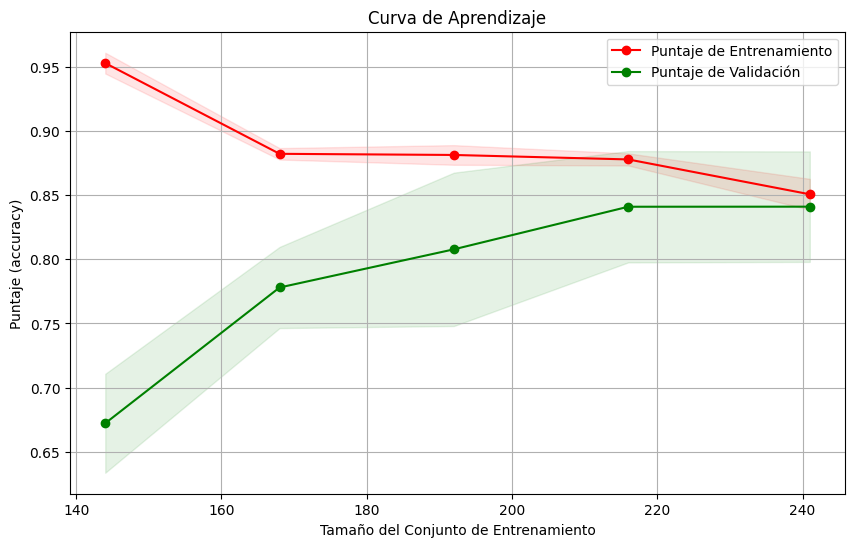

In [ ]:
from sklearn.model_selection import learning_curve


# Define la métrica que deseas evaluar (en este caso, accuracy)
scoring = 'accuracy'

# Genera las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcula las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotea la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje ({})".format(scoring))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntaje de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntaje de Validación")

plt.legend(loc="best")
plt.show()